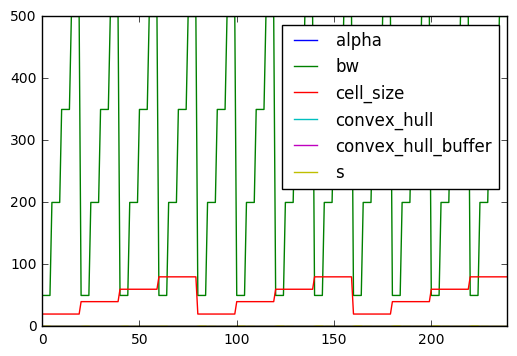

In [1]:
import io
import json

import requests
import pandas as pd
import matplotlib.pyplot as plt

from spatial_segregation import data, kde, analyses, kernel_functions

DATA_DIR = 'https://raw.githubusercontent.com/AnttiHaerkoenen/spatial_segregation/master/data'


def get_text(file, data_dir=DATA_DIR):
    url = '{0}/{1}'.format(data_dir, file)
    s = requests.get(url).content
    textIO = io.StringIO(s.decode('utf-8'))
    return textIO

point_data = json.loads(get_text('points1878.geojson').getvalue())

v80 = data.aggregate_sum(data.reform(pd.read_csv(get_text('1880.csv'))))
v00 = data.aggregate_sum(data.reform(pd.read_csv(get_text('1900.csv'))))
v20 = data.aggregate_sum(data.reform(pd.read_csv(get_text('1920.csv'))))

pop_data = {
    '1880': v80,
    '1900': v00,
    '1920': v20
}   

cells = [i for i in range(20, 81, 20)]
bandwidths = [i for i in range(50, 501, 150)]

data = {year: data.add_coordinates(value, point_data, coordinates_to_meters=False)
        for year, value in pop_data.items()}

ana = analyses.SegregationSurfaceAnalyses(
    data_dict=data,
    cell_sizes=cells,
    kernels=[k for k in kde.KERNELS],
    bws=bandwidths
)
# print(ana.results)
ana.results.plot()
plt.show()

ana2 = analyses.SegregationIndexAnalyses(
    data_dict=data,
    cell_sizes=cells,
    kernels=[k for k in kde.KERNELS],
    bws=bandwidths
)
# print(ana2.results)
ana2.results.plot()
plt.show()

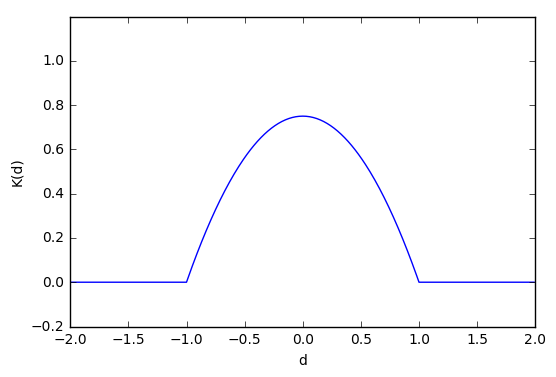

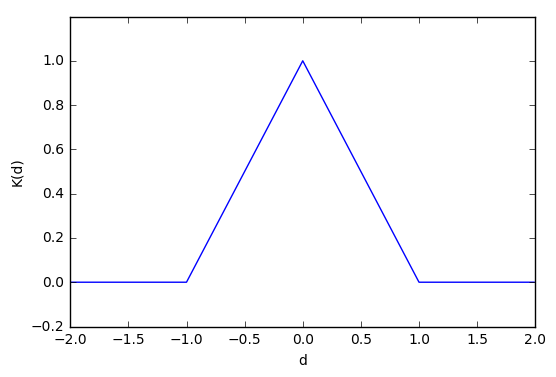

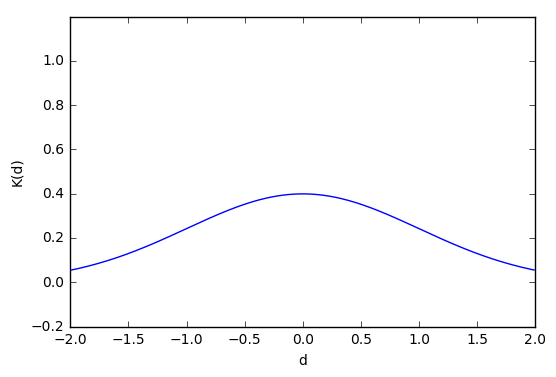

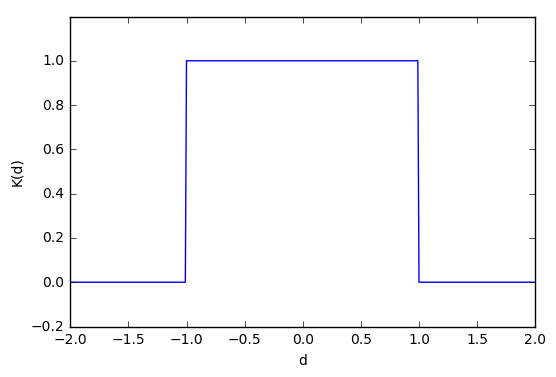

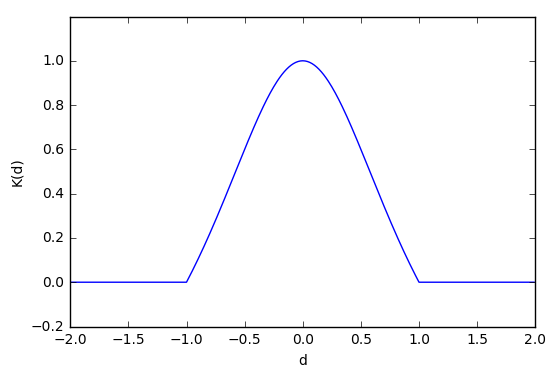

In [1]:
import matplotlib.pyplot as plt

from spatial_segregation import kernel_functions, kde

for k, f in kde.KERNELS.items():
    kernel_functions.plot_kernel(f)
    # plt.title(k.capitalize())
    plt.ylim((-0.2, 1.2))
    plt.ylabel("K(d)")
    plt.xlabel("d")
    plt.show()